<a href="https://colab.research.google.com/github/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

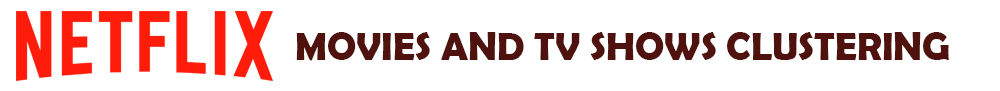

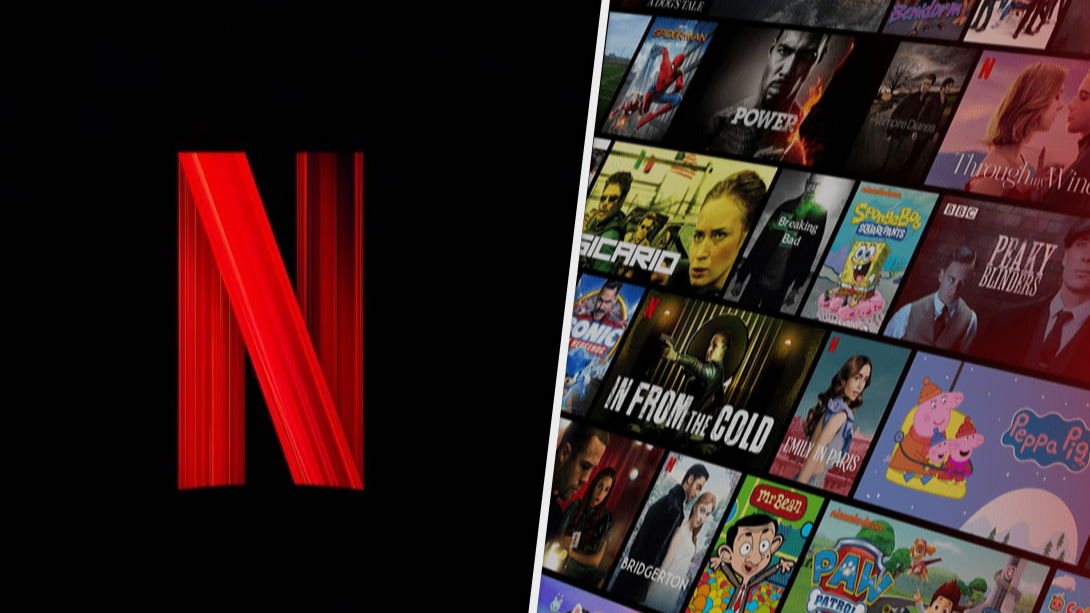

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  Kunal Badgujar
##### **Team Member 2 -** Aarti Gade
##### **Team Member 3 -** Vivek Tanagawade


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

There were approximately 7787 records and 11 attributes in the dataset.

I started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**

https://github.com/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This Dataset consists of Tv shows and Movies available on netflix as of 2019.
the dataset is collected from Flixable. In 2018, they released an intereting report which shows that the number of TV shows on netflix has nearly tripled since 2010. number of movies has decreased by more than 2000 titles since 2010, while its number of tv shows has nearly tripled. it will be intersting to explore what all other insights can be obtained from the same dataset.

Integrating this Dataset with other external dataset such as IMDB rating, rotten tomatos can also provide many intersting findings.

In this project, required to do





*   EDA


*   Understaing what Kind of content is available in differnt contries.
*   If netflix has been increasingly focusing on TV rather than movies in recent years.

*    Clustering similar content by matching text-based features










# ***Let's Begin !***

In [ ]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Firstly import  libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity


# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


.

.

### **Dataset Loading**

In [ ]:
# import csv file from Drive

df=  pd.read_csv('/content/drive/MyDrive/Project Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

.

.

### **Dataset First View**

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# lets see the shape of our dataset

df.shape

(7787, 12)

In [ ]:
# our Dataset has 7787 Rows and 12 Columns 

.

.

### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


we see that our data set cantain some null values in some columns 

.

.

### **Checking for the null values, And deal with them** 

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# we see that columns ( direcor , cast , country , date_addded ) cantains some null values, So we have to deal with them,

In [ ]:
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Now, our dataset have no null values 

.

.

### **lets check for the duplicate values** 

In [ ]:
df.duplicated().sum()

0

our dataset have no duplicate values

.

.

.

## **Understanding Your Variables**

In [ ]:
# lets check the statical description 

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1566,15,216,492,7769
top,s1,Movie,3%,unknown,unknown,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,118,2863,1608,334,3


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


.

.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

.

**Chart - 1 Movies and TV shows**

Text(0.5, 1.0, 'Count of Values')

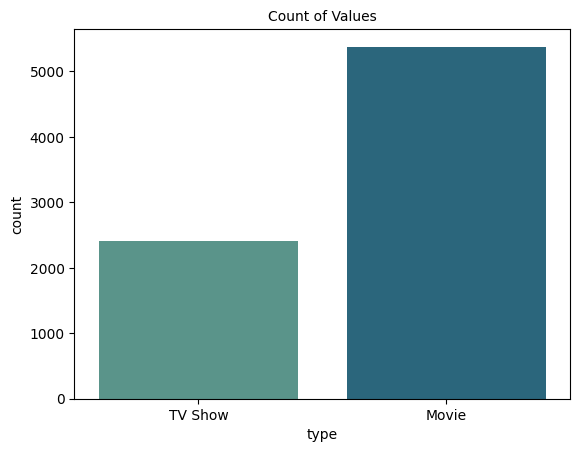

In [ ]:
graph = sns.countplot(x = 'type', data = df,palette='crest')
graph.set_title('Count of Values', size=10)

In this count plot there are more movies 5372(aprox 70%) than TV shows 2398 (aprox30) in the dataset.

.

.

**Chart - 2 country**

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

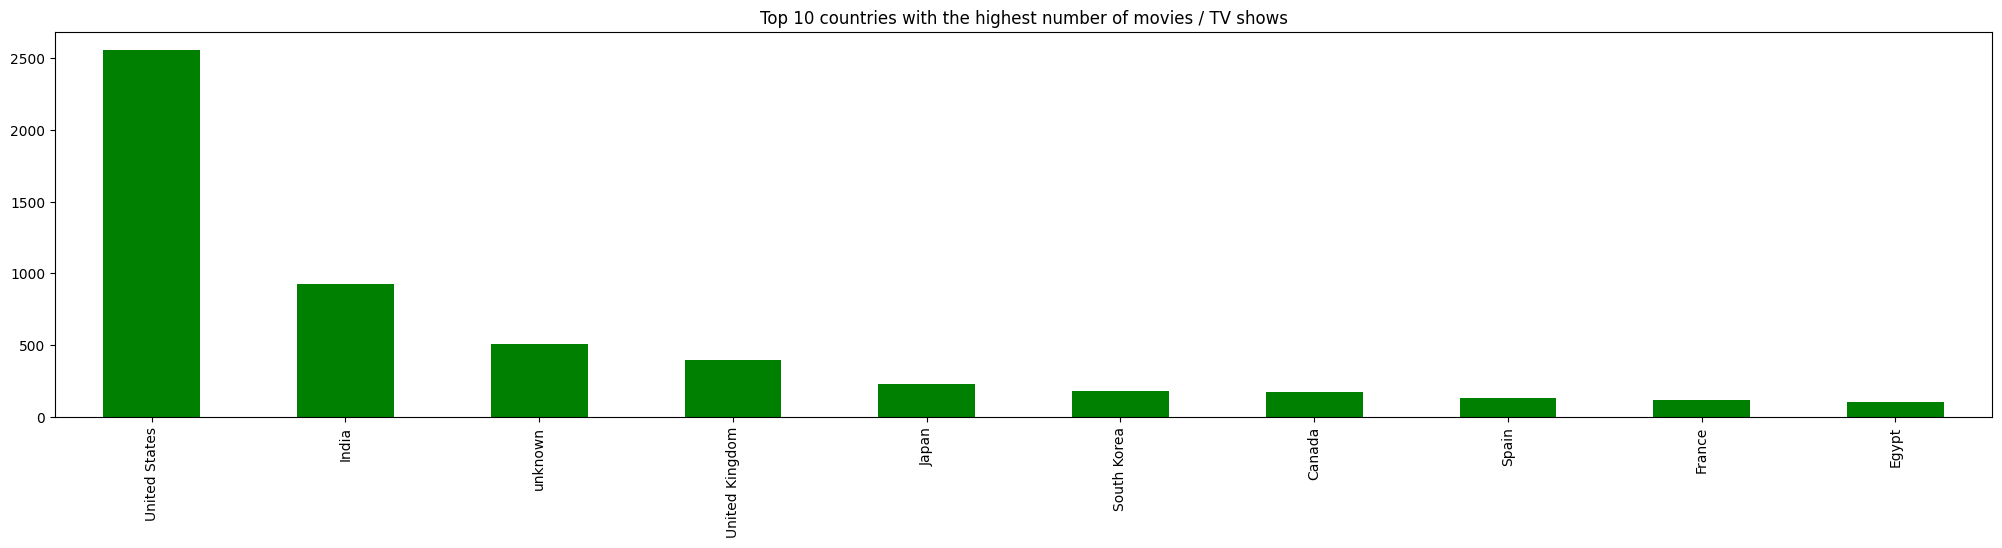

In [ ]:
plt.figure(figsize=(25,5))
df.country.value_counts().nlargest(10).plot(kind='bar', color = 'g')
plt.title('Top 10 countries with the highest number of movies / TV shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

.

.

**Chart - 3 Rating**

Text(0.5, 1.0, ' Age ratings for shows in the dataset')

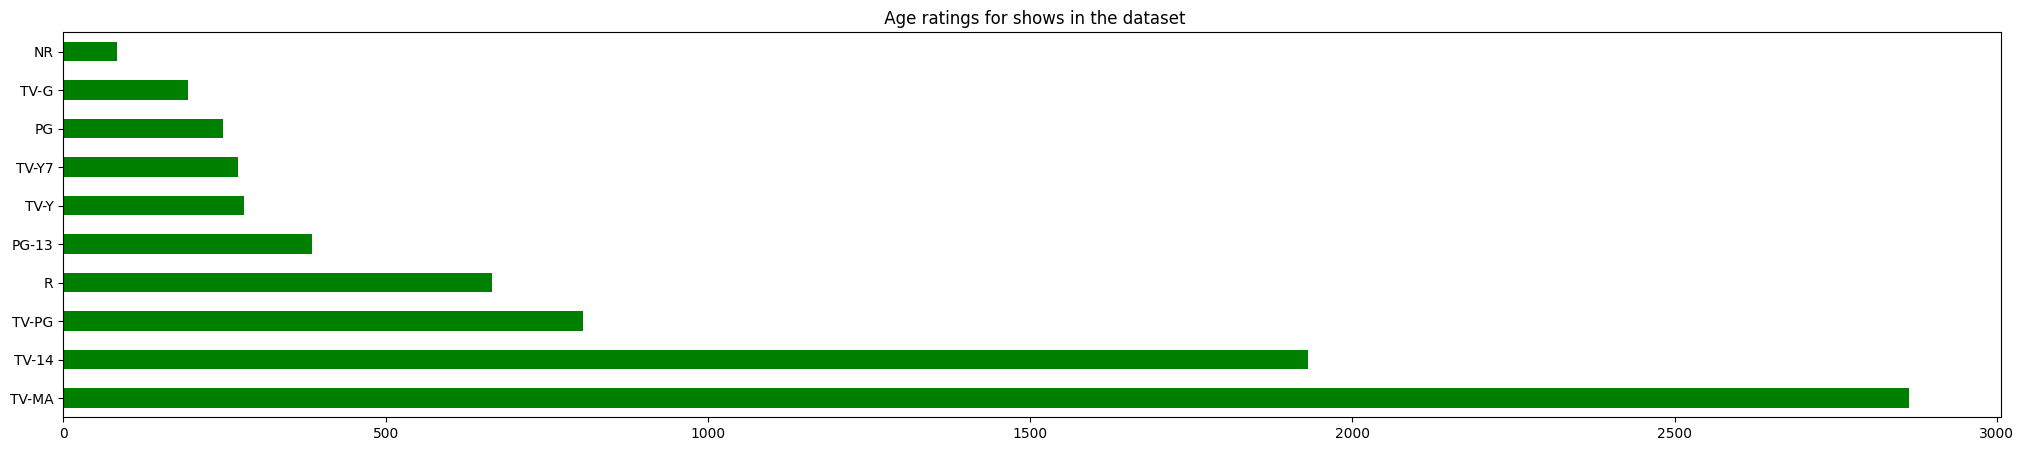

In [ ]:
plt.figure(figsize=(25,5))
df.rating.value_counts().nlargest(10).plot(kind='barh', color='green')
plt.title(' Age ratings for shows in the dataset')

most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

.

.

**Chart - 4 Shows as per year**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

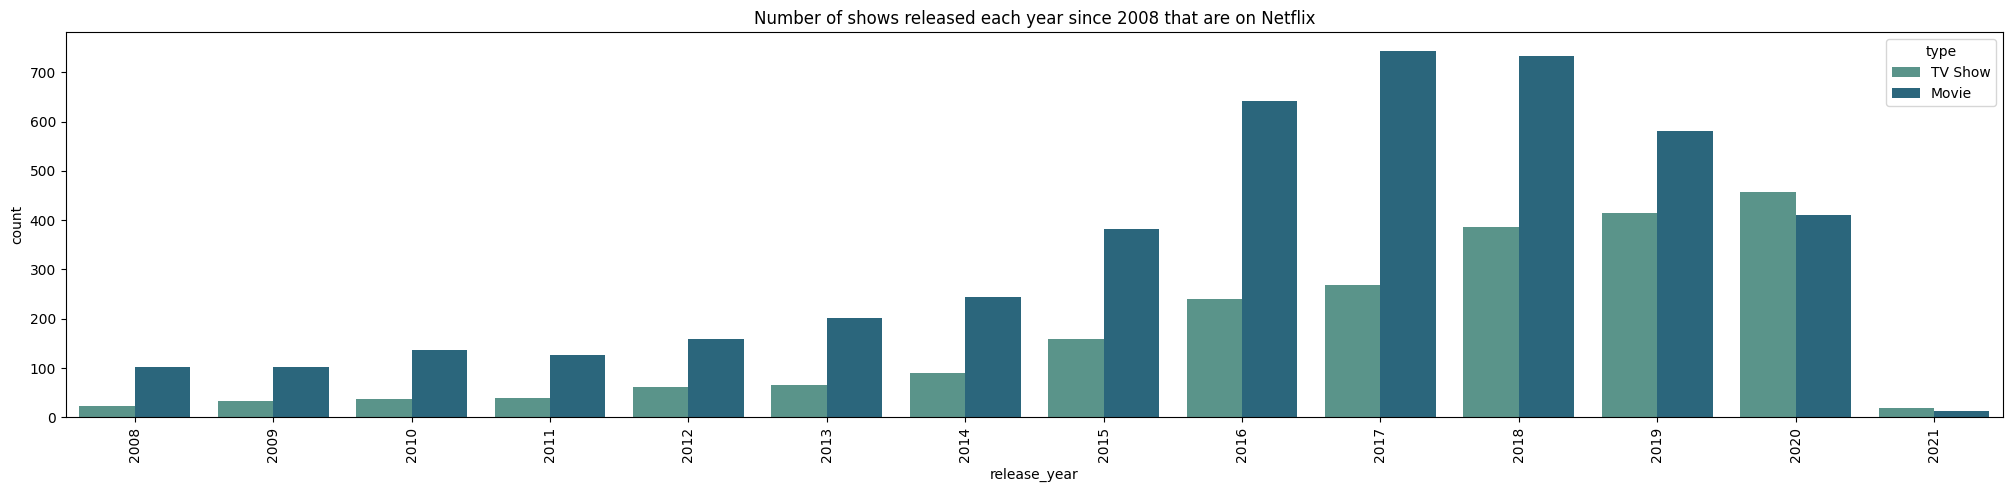

In [ ]:
plt.figure(figsize=(25,5))
count = sns.countplot(x="release_year", hue='type', data=df, order=range(2008,2022),palette='crest')
count.set_title('Number of shows released each year since 2008 that are on Netflix')
plt.xticks(rotation=90)

1. Netflix has greater number of new movies / TV shows than the old ones.

2. Over the years, Netflix has consistently focused on adding more shows in its platform.

3. As per the plot movies rate is high as compared to tv shows

.

.

**Chart - 5 Director**

Text(0.5, 1.0, 'top 10 director who directed TV Movie')

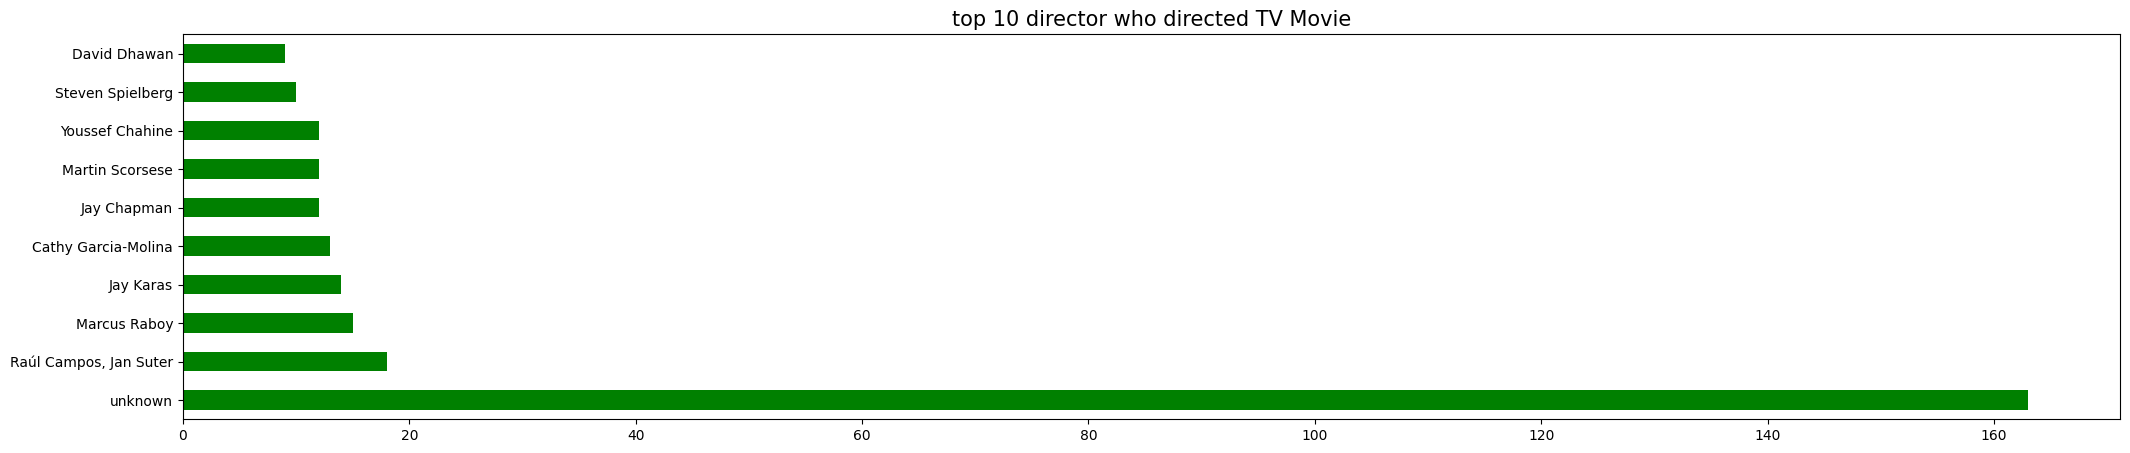

In [ ]:
# top 10 director who directed TV show
plt.figure(figsize=(25,5))
show = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh',color='g')
show.set_title('top 10 director who directed TV Movie', size=15)

Alastair Fothergill has directed TV shows, the most of any director

Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet

.

.

**Chart - 6 Top 10 genres for TV Show**

Text(0.5, 1.0, 'Top 10 genres for TV Show')

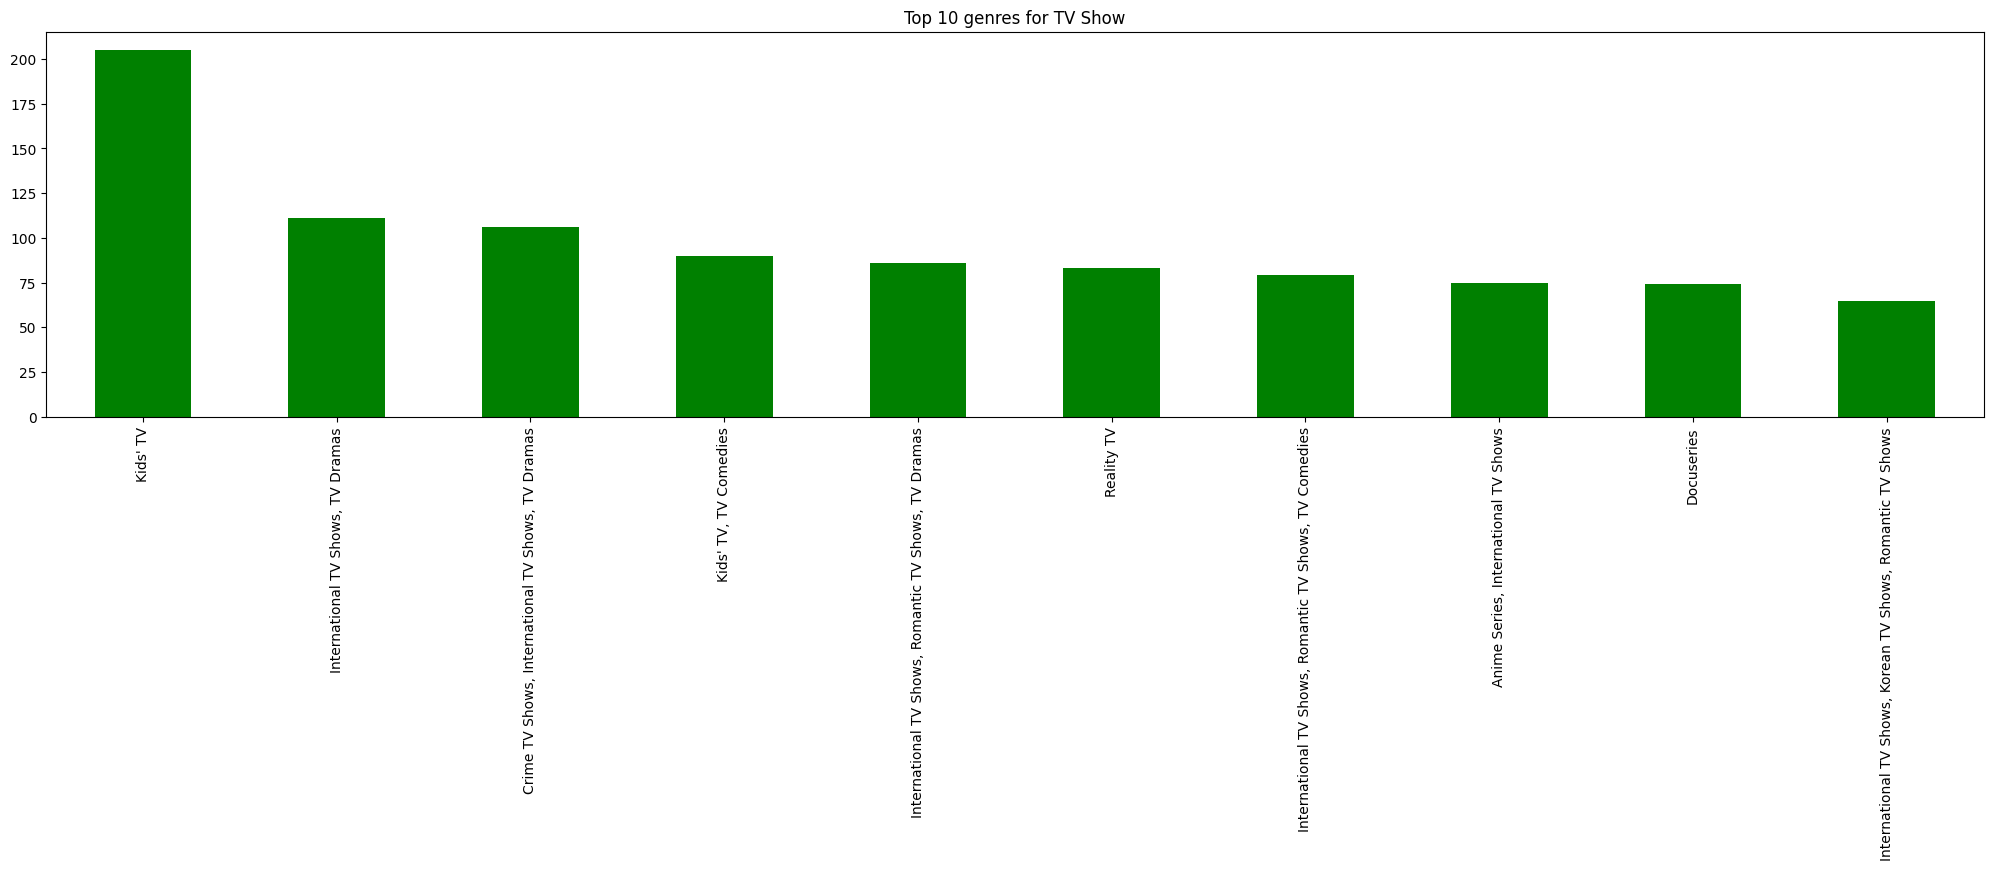

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(25,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar',color='g')
plt.title('Top 10 genres for TV Show')

In this graph we found Top 10 genres for tv shows and kids tv shows highest among all

.

.

**Chart 7 Actor**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

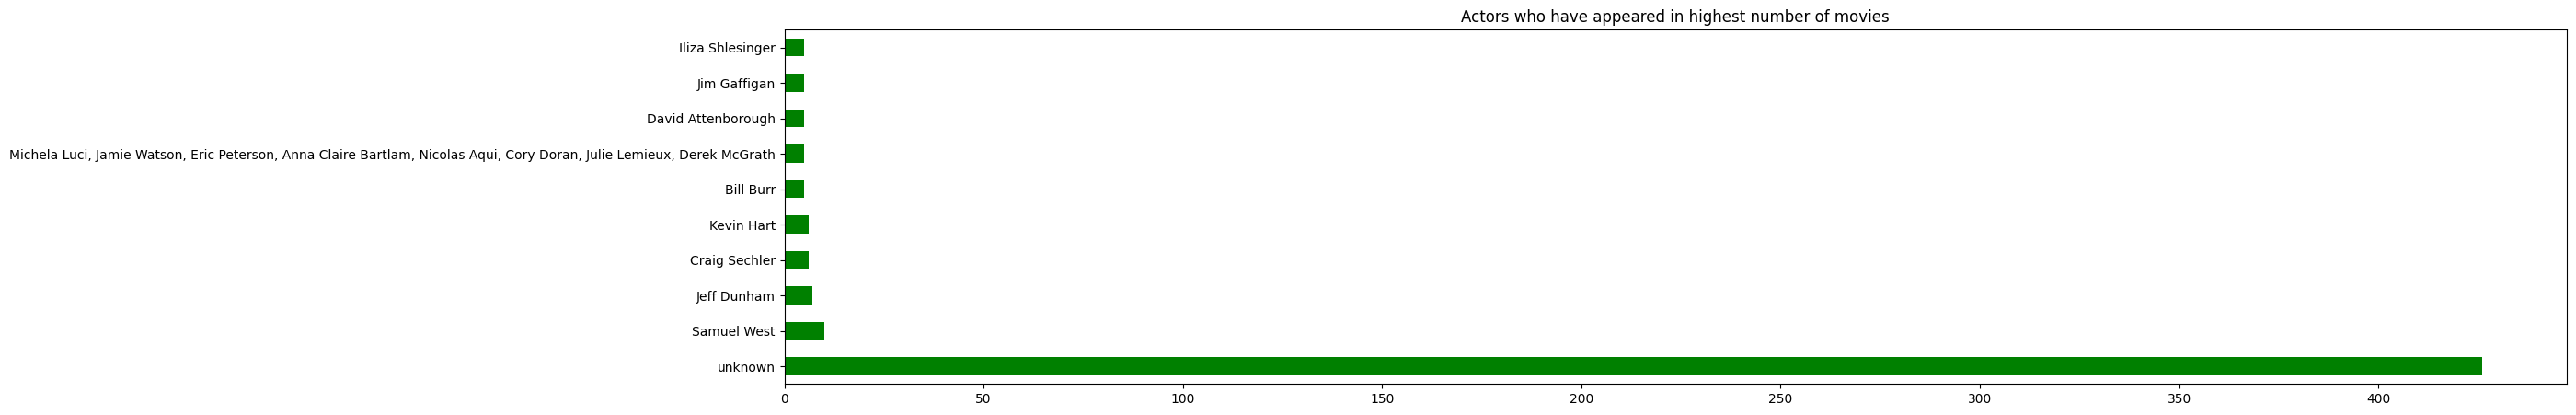

In [ ]:
# Top actors for movies
plt.figure(figsize=(25,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh' ,color = 'g')
plt.title('Actors who have appeared in highest number of movies')

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

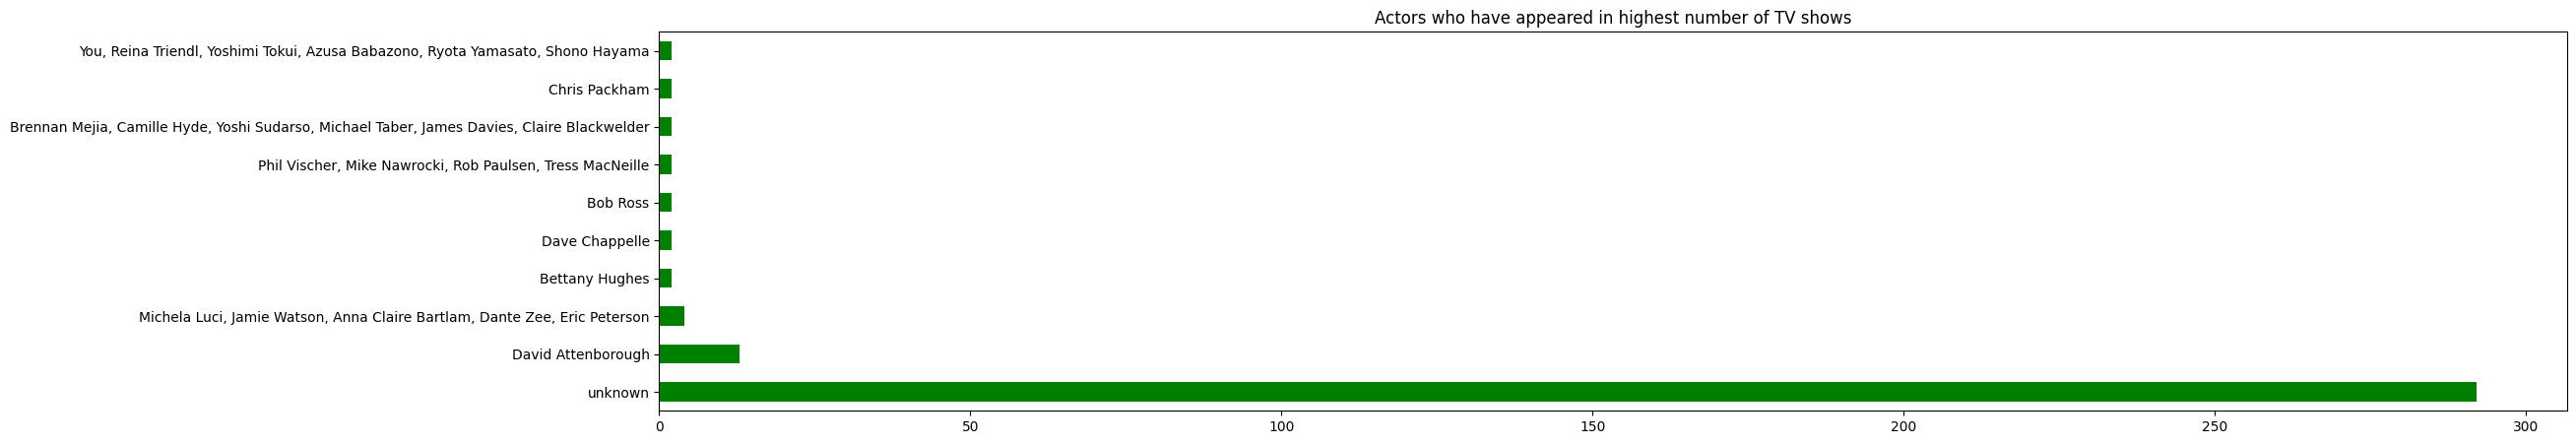

In [ ]:
# Top actors for movies
plt.figure(figsize=(25,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh',color ='g')
plt.title('Actors who have appeared in highest number of TV shows')

1. David attenborough played highest role in the TV shows.
2. Samuel west played highest number of role in the movies.

.

.

**Chart - 9 Description**

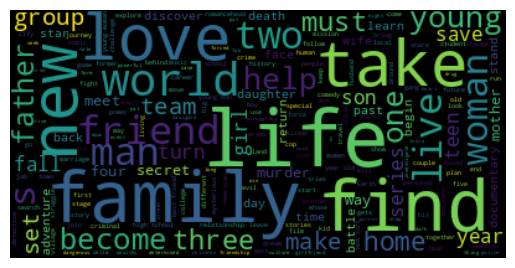

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()
     

Most of the comman words present in description column are family, find, life, love, new, world, friend.

.

.

.

## **Feature Engineering & Data Pre-processing**

**Textual Data Preprocessing**

In [ ]:
# creating clustering_attributes column using all text column which one is used for model building purpose.

df['clustering_attributes'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director'] 
df.clustering_attributes[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilunknown'

We have successfully added all the necessary data into a single column

.

**Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters

df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])
df['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazilunknown'

.

**Removing Punctuation**

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)     

In [ ]:
# Removing punctuation marks

df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)
df['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorInternational TV Shows TV Dramas TV SciFi  FantasyTVMAJoao Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zeze Motta Celso FrateschiBrazilunknown'

.

**Removing stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library

sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words

df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)
df['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmajoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

.

**Stemming**

In [ ]:
# create an object of stemming function

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

df['clustering_attributes'] = df['clustering_attributes'].apply(stemming)
df['clustering_attributes'][0]


'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

.

**Text Vectorization**

In [ ]:
# extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000) 
# max features = 10000 to prevent system from crashing


# fit the vectorizer using the text data
tfid_matrix = tfid_vectorizer.fit_transform(df['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray() 


print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7787, 10000)
datatype : <class 'numpy.ndarray'>


.

**Dimesionality Reduction**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality

pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

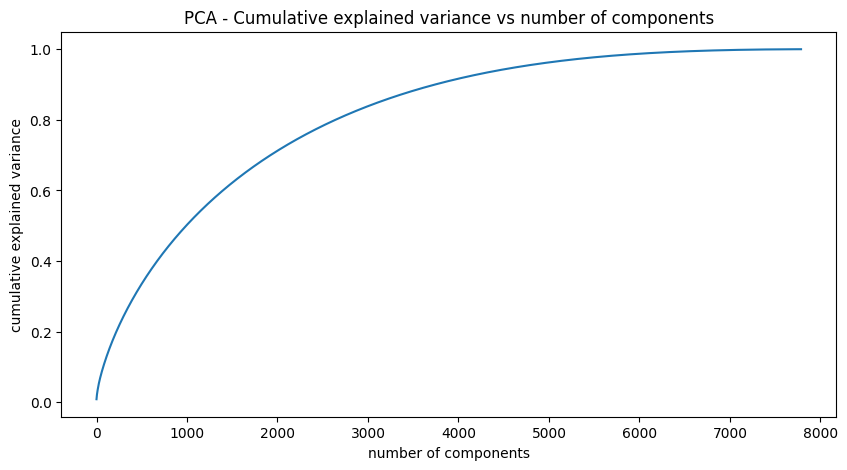

In [ ]:
# Explained variance for different number of components

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7600 components. Also, more than 80% of the variance is explained just by 4000 components.

In [ ]:
# reducing the dimensions to 4000 using pca

pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

PCA(n_components=4000, random_state=0)

In [ ]:
# transformed features
X = pca.transform(array)

In [ ]:
# shape of transformed vectors
X.shape

(7787, 4000)

.

.

.

## **K-Means Clustering**

Text(0, 0.5, 'WCSS')

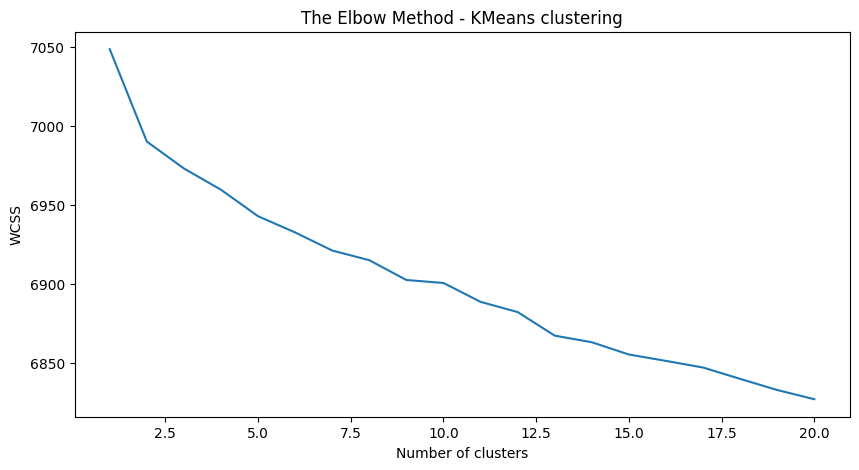

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,21):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,21)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


WCSS (Within-Cluster Sum of Squared) distance between each point and centriod in cluster decresed with increse the no. of cluster






**Building clusters using the k-means algorithm:**

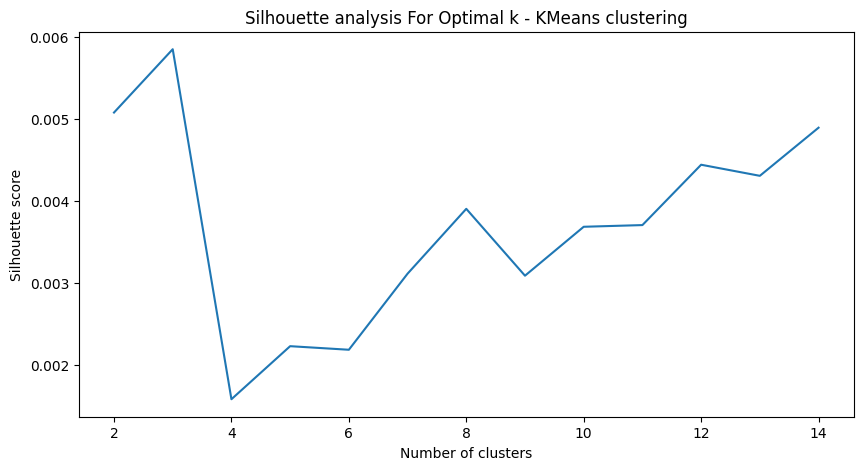

In [ ]:
# Silhouette score method to find the optimal value of k
# Initialize a list to store the silhouette score for each value of k

silhouette_scr = []
for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 6 clusters

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X)
     

KMeans(n_clusters=6, random_state=0)

In [ ]:
# Evaluation metrics - distortion, Silhouette score

kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_
     

Text(0.5, 1.0, 'Number of movies and TV shows in each cluster - Kmeans Clustering')

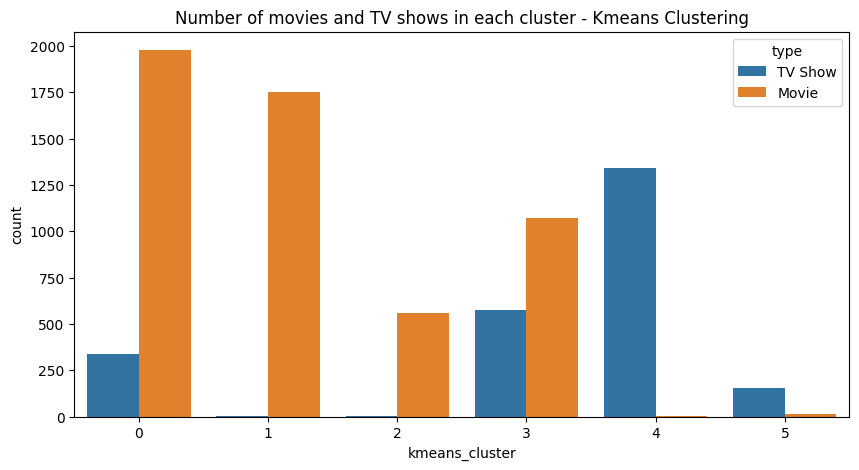

In [ ]:
# Number of movies and tv shows in each cluster

plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

Successfully built 6 clusters using the k-means clustering algorithm.

## **Hierarchical clustering:**

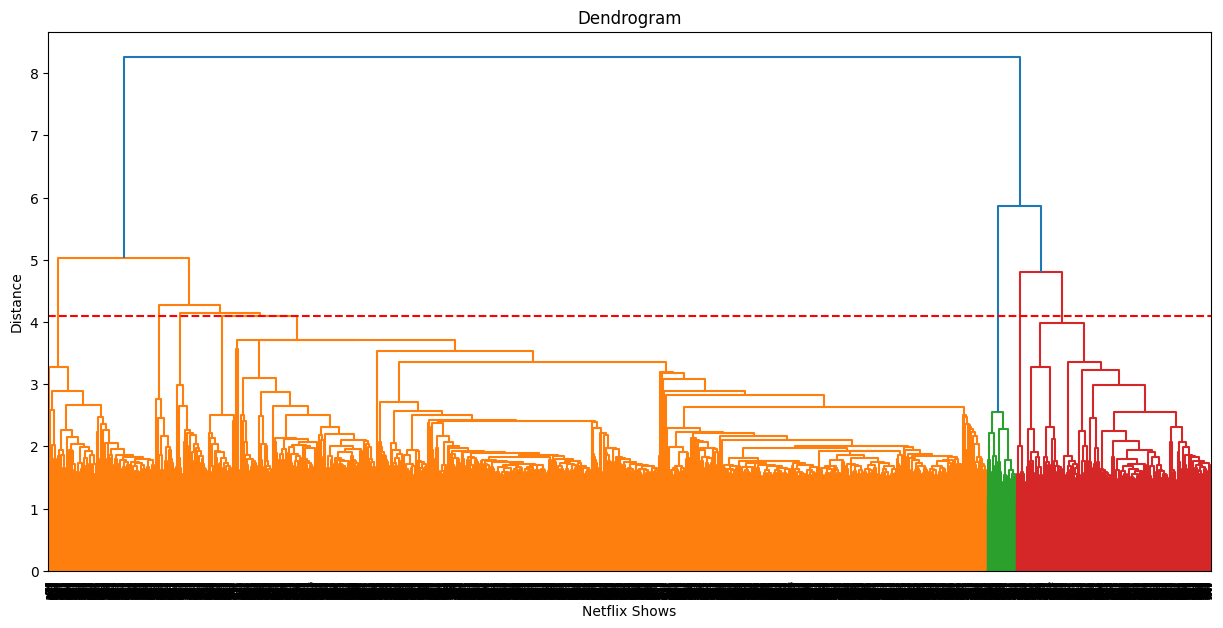

In [ ]:
# Building a dendogram to decide on the number of clusters

plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

At a distance of 4.1 units, 7 clusters can be built using the agglomerative clustering algorithm

In [ ]:
# Fitting hierarchical clustering model

hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)     

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Adding a hierarchical cluster number attribute

df['hierarchical_cluster'] = hierarchical.labels_
     

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

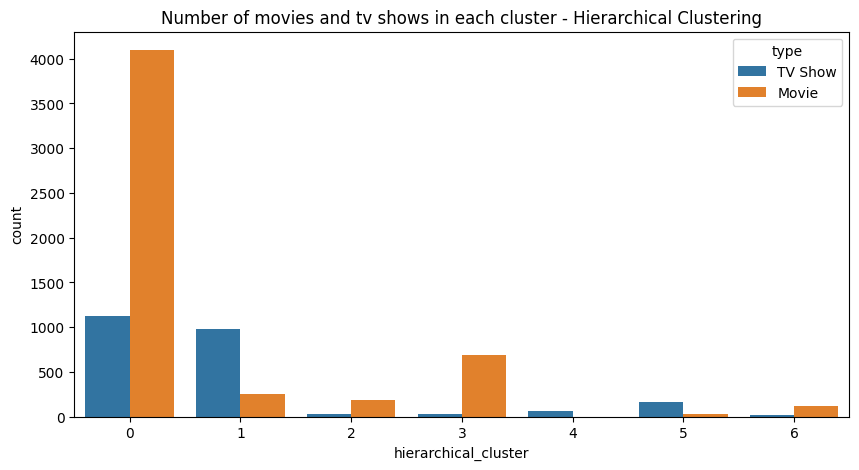

In [ ]:
# Number of movies and tv shows in each cluster

plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm

## **using content based recommender system**

This method uses only information about description of the items users have previously consumed model users's interfernce or we also said that algorithm try to recomended items that are similar to those that a user liked in the past

In [ ]:
# veryfying index
df[['show_id', 'title', 'clustering_attributes']]

,show_id,title,clustering_attributes
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7782,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7783,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7785,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next willi w...


In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X
     

array([[ 0.16413685, -0.01268797, -0.00586496, ..., -0.00994255,
        -0.00329091, -0.00233198],
       [-0.04374526,  0.00780303, -0.01293567, ..., -0.00261298,
         0.00497744,  0.01100651],
       [-0.04271966,  0.03133933,  0.04716164, ...,  0.0024967 ,
        -0.00113403, -0.00180819],
       ...,
       [-0.07317324,  0.03335414, -0.05971164, ..., -0.00404275,
         0.00094841,  0.00215312],
       [ 0.06937705, -0.03790424, -0.03649031, ...,  0.00379507,
         0.01045155,  0.00376387],
       [-0.06876567, -0.06554887, -0.04920801, ..., -0.00778094,
         0.01020322,  0.00274851]])

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08017164,  0.01936775, ..., -0.02054093,
         0.00846405, -0.01443897],
       [ 0.08017164,  1.        , -0.00227778, ...,  0.06855227,
        -0.00620217, -0.00655923],
       [ 0.01936775, -0.00227778,  1.        , ...,  0.0027997 ,
        -0.00758196, -0.0110058 ],
       ...,
       [-0.02054093,  0.06855227,  0.0027997 , ...,  1.        ,
        -0.00921974,  0.0538533 ],
       [ 0.00846405, -0.00620217, -0.00758196, ..., -0.00921974,
         1.        ,  0.04403756],
       [-0.01443897, -0.00655923, -0.0110058 , ...,  0.0538533 ,
         0.04403756,  1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = df[df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)
     

In [ ]:
recommend('A Family Man')

If you liked 'A Family Man', you may also enjoy: 

The Last Thing He Wanted
Platoon
Nightflyers
Rounders
XXX: State of the Union
BoJack Horseman Christmas Special: Sabrina's Christmas Wish
Dog Eat Dog
What Happened to Monday
Fartsa
Anesthesia


In [ ]:
recommend('Time Share')

If you liked 'Time Share', you may also enjoy: 

Bayonet
Husbands in Goa
Alarmoty in the Land of Fire
Happy Times
Even the Rain
What We Wanted
Two Catalonias
Breaking Bad
The Similars
A Billion Colour Story


.

.

.

# **Conclusion**

There were approximately 7787 records and 11 attributes in the dataset.

Then I do check top five rows and bottom five rows and unique feature

*   I started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

*   Then I did some texual data preprocessing in that i did removing stop word ,removing punctuation,stemming.

*   The attributes were chosen as the basis for the clustering of the data: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

*   10000 attributes in total were created by TFIDF vectorization

*   i used (PCA) to reduce dimensionality.4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

*   after that we bluid K- means clustering in that i used two method elbow method and silhouette mathod

*   Then clusters were built using the Agglomerative clustering algorithm

*   A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make top 10 recommendations to the user based on the type of show they watched

